<img src="images/keepcoding.png" width=200 align="left">

# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a los datos

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [3]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [4]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en galones por milla) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo.

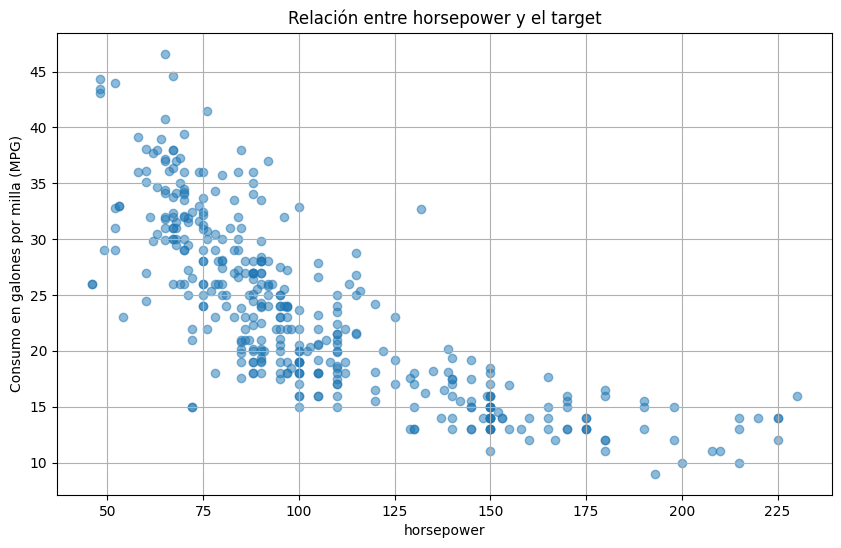

In [5]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # Selecciona la columna correcta del dataframe
    X = df[nombre_columna]
    
    # Dibuja la gráfica
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5)
    plt.xlabel(nombre_columna)
    plt.ylabel('Consumo en galones por milla (MPG)')
    plt.title(f'Relación entre {nombre_columna} y el target')
    plt.grid(True)
    plt.show()


visualiza(X, y,'horsepower')

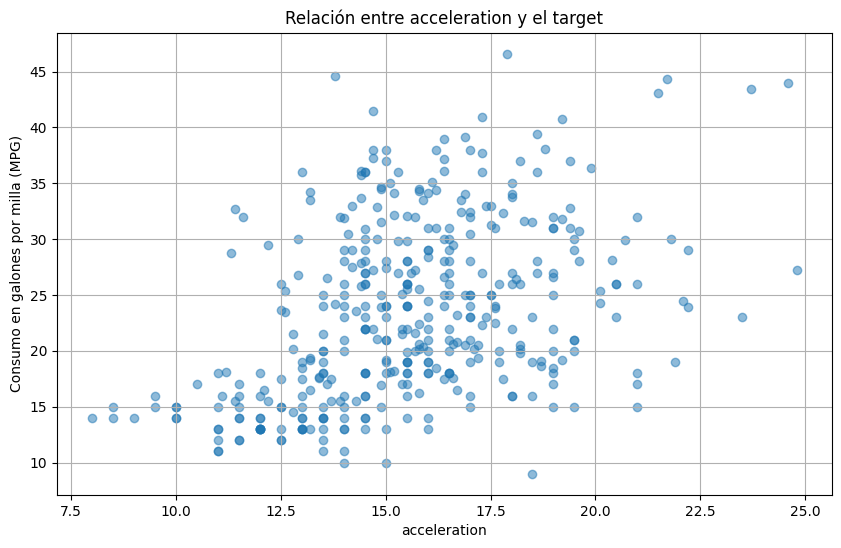

In [6]:
visualiza(X, y, 'acceleration')

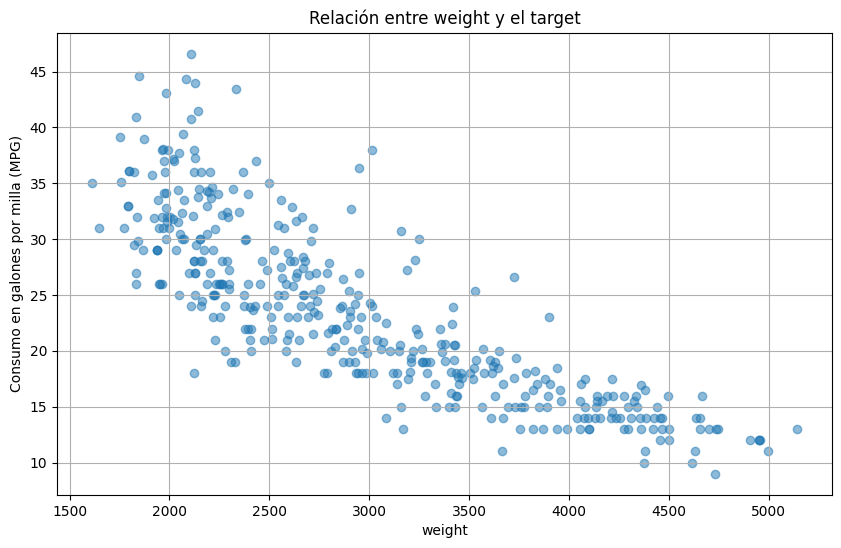

In [7]:
visualiza(X, y, 'weight')

Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [8]:
import numpy as np

def pesos_ols(X, y):
    """
    Calcula los pesos usando la fórmula de mínimos cuadrados.

    Parámetros:
    X : array
        Matriz de características.
    y : array
        Variable objetivo.

    Retorna:
    w : array
        Pesos calculados para la regresión lineal.
    """
    # Comprobar si hay más features que observaciones y trasponer X si es necesario
    if X.shape[1] > X.shape[0]:
        X = X.T

    # Añadir una columna de unos para el término de bias
    ones = np.ones((X.shape[0], 1))
    X_b = np.concatenate((ones, X), axis=1)

    # Calcular la transpuesta de X_b
    X_bt = np.transpose(X_b)

    # Calcular la inversa de (X_b^T * X_b)
    inversas = np.linalg.inv(np.dot(X_bt, X_b))

    # Calcular los pesos
    w = inversas.dot(X_bt).dot(y)

    return w

# Ejemplo de uso
X_ejemplo = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077],
                      [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_ejemplo = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
w_ejemplo = pesos_ols(X_ejemplo, y_ejemplo)
print("Pesos calculados (ejemplo):", w_ejemplo)



Pesos calculados (ejemplo): [-2.29223802e+06  5.92536529e+01  1.20780450e+03]


### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

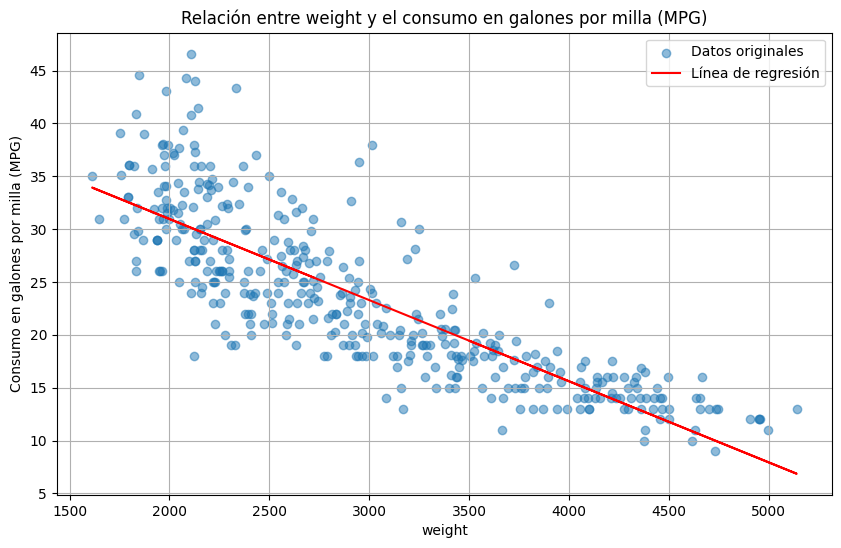

In [9]:
# TODO Aplica el modelo y dibuja la recta junto con los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Convertir los dataframes de Pandas en arrays de numpy
X_weight = X[['weight']].values
y_mpg = y.values

# Calcular los pesos usando pesos_ols
w = pesos_ols(X_weight, y_mpg)

# Función para dibujar la gráfica con la recta de regresión
def visualiza_regresion(df, y, nombre_columna, w):
    """
    Genera una gráfica del consumo en galones por milla (MPG) vs una variable específica
    y dibuja la recta de regresión lineal.

    Parámetros:
    df : DataFrame
        DataFrame de características.
    y : Series o array
        Variable objetivo (consumo en galones por milla, MPG).
    nombre_columna : str
        Nombre de la columna en el DataFrame de características para la gráfica.
    w : array
        Pesos calculados para la regresión lineal.
    """
    X = df[nombre_columna].values.reshape(-1, 1)
    X_b = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    y_pred = X_b.dot(w)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.5, label='Datos originales')
    plt.plot(X, y_pred, color='red', label='Línea de regresión')
    plt.xlabel(nombre_columna)
    plt.ylabel('Consumo en galones por milla (MPG)')
    plt.title(f'Relación entre {nombre_columna} y el consumo en galones por milla (MPG)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizar la regresión
visualiza_regresion(X, y, 'weight', w)


Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [10]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Supongamos que ya tienes el DataFrame X y la Serie y
# X = pd.read_csv('path_to_data.csv')  # Cargar el DataFrame X
# y = X['mpg']  # Variable objetivo

# Convertir los dataframes de Pandas en arrays de numpy
X_weight = X[['weight']].to_numpy()
y_mpg = y.to_numpy().reshape(-1, 1)

# Función para calcular los pesos usando mínimos cuadrados ordinarios (OLS)
def pesos_ols(X, y):
    X_b = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  # Añadir columna de unos
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Calcular los pesos usando pesos_ols
w = pesos_ols(X_weight, y_mpg)

# Imprimir los pesos calculados
print("Pesos calculados (tu implementación):", w.flatten())

# Implementación con scikit-learn
# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr, y_lr)

# Imprimir los pesos calculados por scikit-learn
print("Punto de corte (scikit-learn):", lr.intercept_)
print("Pendiente (scikit-learn):", lr.coef_)

# Comparar los resultados
print("Comparación de resultados:")
print("Tu implementación - Punto de corte:", w[0])
print("scikit-learn - Punto de corte:", lr.intercept_)
print("Tu implementación - Pendiente:", w[1])
print("scikit-learn - Pendiente:", lr.coef_[0])

Pesos calculados (tu implementación): [ 4.63173644e+01 -7.67661006e-03]
Punto de corte (scikit-learn): [46.31736442]
Pendiente (scikit-learn): [[-0.00767661]]
Comparación de resultados:
Tu implementación - Punto de corte: [46.31736442]
scikit-learn - Punto de corte: [46.31736442]
Tu implementación - Pendiente: [-0.00767661]
scikit-learn - Pendiente: [-0.00767661]


### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



In [12]:
import numpy as np

# Método de mínimos cuadrados
def pesos_ols(X, y):
    X_b = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  # Añadir columna de unos
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Descenso del gradiente
def descenso_gradiente(X, y, alpha=0.01, iteraciones=1000):
    X = np.array(X)
    y = np.array(y)
    m, n = X.shape
    # Inicializamos los coeficientes aleatoriamente
    w = np.random.randn(n + 1)
    # Agregamos una columna de unos para el término independiente
    X = np.concatenate((np.ones((y.shape[0], 1)), X), axis=1)
    for _ in range(iteraciones):
        # Calculamos las predicciones
        y_pred = np.dot(X, w)
        # Calculamos el gradiente
        gradiente = (1/m) * np.dot(X.T, (y_pred - y))
        # Actualizamos los coeficientes
        w -= alpha * gradiente
    return w

# Ejemplo de uso
# Datos de ejemplo
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 2] + np.random.randn(100)

# Mínimos cuadrados
w_mc = pesos_ols(X, y)
print("Coeficientes obtenidos con mínimos cuadrados:", w_mc)

# Descenso del gradiente
w_dg = descenso_gradiente(X, y)
print("Coeficientes obtenidos con descenso del gradiente:", w_dg)



Coeficientes obtenidos con mínimos cuadrados: [ 0.33789776  1.59539648 -0.39105284  3.11190588 -0.02496725 -0.32588518]
Coeficientes obtenidos con descenso del gradiente: [ 0.62659769  1.79309226 -0.16965143  1.19332491  0.22278007  0.27211056]


## 2. Optimización con descenso del gradiente [OPCIONAL]

Este ejercicio es opcional, no es necesario hacerlo para conseguir el APTO en la práctica, pero podéis hacerlo si queréis practicar más sobre el método del descenso del gradiente, que es muy importante en machine learning.

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [ ]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    X_b = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    # TODO 2 Haz un bucle para las iteraciones 
    # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
    for i in range(n_iter):
        # Calcula las predicciones
        y_pred = X_b.dot(w)
        # Calcula el error
        error = y_pred - y
        # Calcula el gradiente
        gradients = 2/X.shape[0] * X_b.T.dot(error)
        # Actualiza los pesos
        w = w - eta * gradients

        # Guarda los pesos y la pérdida
        w_iter.append(w)
        loss_iter.append(np.mean(error**2))
    
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

# Ejecución del descenso del gradiente
weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

In [ ]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate


# TODO 2 Aplicamos el algoritmo


# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# TODO 3 Dibuja la gráfica
